## Telecom Churn Case Study

### Data Understanding

In [143]:
# Importing all the necessary packages required for data understanding and processing

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Setting below options to display maximum rows and columns since we have large set of columns data
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
#Following steps have been performed for this project

#1.Analyse and Preprocess Data
#2.Derive new features and Perform exploratory analysis 
#3.Handle Outliers
#4.Handle class imbalance using SMOT technique
#5.PCA and building model for predection
#6.Build another model to explain important features.
#7.Conclusion

# 1.Analyse and Preprocess Data

In [144]:
# Loading the telecom dataset into a dataframe
# Also looking at the first five rows

df = pd.read_csv('telecom_churn_data.csv')
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [145]:
# Shape of the dataframe

df.shape

(99999, 226)

In [146]:
# Checking the descriptive information

df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

In [147]:
# Verifying if dataframe has any null values

df.isnull().sum()

mobile_number                   0
circle_id                       0
loc_og_t2o_mou               1018
std_og_t2o_mou               1018
loc_ic_t2o_mou               1018
last_date_of_month_6            0
last_date_of_month_7          601
last_date_of_month_8         1100
last_date_of_month_9         1659
arpu_6                          0
arpu_7                          0
arpu_8                          0
arpu_9                          0
onnet_mou_6                  3937
onnet_mou_7                  3859
onnet_mou_8                  5378
onnet_mou_9                  7745
offnet_mou_6                 3937
offnet_mou_7                 3859
offnet_mou_8                 5378
offnet_mou_9                 7745
roam_ic_mou_6                3937
roam_ic_mou_7                3859
roam_ic_mou_8                5378
roam_ic_mou_9                7745
roam_og_mou_6                3937
roam_og_mou_7                3859
roam_og_mou_8                5378
roam_og_mou_9                7745
loc_og_t2t_mou

In [148]:
# Checking the total number of null values in terms of percentage

round(df.isnull().sum()/len(df)*100, 2)

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_6         0.00
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou

**Findings**: There are many columns having more than 70% values are missing

In [149]:
# Let's look at the columns with more than 70% missing values

missing_value_cols_70 = []
missing_value_cols_70 = [cols for cols in df.columns if (df[cols].isnull().sum()/len(df)*100)>70]

In [150]:
missing_value_cols_70

['date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_3g_9',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'arpu_2g_9',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'night_pck_user_9',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'fb_user_9']

In [151]:
# We can impute the NA values of total_rech_data columns to 0, considering there were no recharge done by the customer

df['total_rech_data_6'] = df['total_rech_data_6'].fillna(0)
df['total_rech_data_7'] = df['total_rech_data_7'].fillna(0)
df['total_rech_data_8'] = df['total_rech_data_8'].fillna(0)
df['total_rech_data_9'] = df['total_rech_data_9'].fillna(0)

In [152]:
# Similarly We can impute the NA values of max_rech_data columns to 0, considering there were no recharge done by the customer

df['max_rech_data_6'] = df['max_rech_data_6'].fillna(0)
df['max_rech_data_7'] = df['max_rech_data_7'].fillna(0)
df['max_rech_data_8'] = df['max_rech_data_8'].fillna(0)
df['max_rech_data_9'] = df['max_rech_data_9'].fillna(0)

In [153]:
# Similarly We can impute the NA values of av_rech_amt_data columns to 0, considering there were no recharge done by the customer

df['av_rech_amt_data_6'] = df['av_rech_amt_data_6'].fillna(0)
df['av_rech_amt_data_7'] = df['av_rech_amt_data_7'].fillna(0)
df['av_rech_amt_data_8'] = df['av_rech_amt_data_8'].fillna(0)
df['av_rech_amt_data_9'] = df['av_rech_amt_data_9'].fillna(0)

In [154]:
# Let's look at some Categorical columns

cat_cols = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9', 
           'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9']

In [155]:
# We can impute the missing values to 0 for the categorical columns considering the fact that customer didn't opt for night pack and fb services

df[cat_cols] = df[cat_cols].apply(lambda x:x.fillna(0))

In [156]:
# Dropping the below date related columns having more than 70% missing values

date_cols_missing_70 = ['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9']
df = df.drop(date_cols_missing_70, axis=1)

In [157]:
# Dropping the below columns having more than 70% missing values

count_arpu_cols = ['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
                 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9',
                 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_3g_9', 
                 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'arpu_2g_9']
df = df.drop(count_arpu_cols, axis=1)

In [158]:
# There are few columns with only one unique value

cols_with_one_unique_val = [cols for cols in df.columns if df[cols].nunique()==1]
cols_with_one_unique_val

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_t2c_mou_9',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8',
 'std_ic_t2o_mou_9']

In [159]:
# We can drop this unique valued features as it will not add any value to the model building and analysis

df = df.drop(cols_with_one_unique_val, axis=1)

# 2.Derive new features and Perform exploratory analysis 

In [160]:
# We can create new feature as total_rech_amt_data using total_rech_data and av_rech_amt_data 
# This will capture amount utilized by customer for data

df['total_rech_amt_data_6'] = df['total_rech_data_6'] * df['av_rech_amt_data_6']
df['total_rech_amt_data_7'] = df['total_rech_data_7'] * df['av_rech_amt_data_7']

In [161]:
# Total data recharge and total call recharge will give the total recharge amount for a month

df['amt_rech_6'] = df['total_rech_amt_6'] + df['total_rech_amt_data_6']
df['amt_rech_7'] = df['total_rech_amt_7'] + df['total_rech_amt_data_7']

In [162]:
# Total average recharge amount for months 6 and 7 (the good phase)

df['total_avg_rech_amt_good_phase'] = (df['amt_rech_6'] + df['amt_rech_7'])/2

### Filter High Value Customers

##### Customers who have recharged more than or equal to 70th percentile of average recharge amount in good phase are considered to be high value customers

In [163]:
# Let's look at the 70th percentile recharge amount

high_val_cust_filter = df['total_avg_rech_amt_good_phase'].quantile(0.7)
high_val_cust_filter

478.0

In [164]:
# Retain only high value customers in the dataset

df_high_val_cust = df[df['total_avg_rech_amt_good_phase']>high_val_cust_filter]
df_high_val_cust.shape

(29953, 195)

**Findings**: Total number of records extracted after retaining only high value customers - **29.9k**

### Tag Churners and Remove Attributes of Churn Phase

1. We need to tag the churned customers (churn=1, non-churn=0) based on the 9th month data
2. Customers who have not made any calls and have not used mobile data even once in the churn phase (9th month) are considered as churned
3. Features to be considered to define churn - total_ic_mou_9, total_og_mou_9, vol_2g_mb_9, vol_3g_mb_9

In [165]:
# Tag churners based on the churn phase data

df_high_val_cust['target'] = (df_high_val_cust[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].sum(axis=1)==0).astype('int')

In [166]:
# Check the number of churn and non-churn customers

df_high_val_cust['target'].value_counts()

0    27520
1     2433
Name: target, dtype: int64

<AxesSubplot:ylabel='target'>

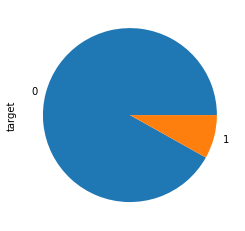

In [167]:
# let's check the % of churned customers

round(df_high_val_cust['target'].value_counts()/len(df_high_val_cust)*100, 2)


# Visualising the same churn ratio with pie chart

(df_high_val_cust['target'].value_counts(1)*100).plot(kind='pie')

In [168]:
# Removing all the attributes of Churn phase since we have derived the target columns

churn_phase_cols = df_high_val_cust.columns[df_high_val_cust.columns.str.contains('_9')]
churn_phase_cols

Index(['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9',
       'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9',
       'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9',
       'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9',
       'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9',
       'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9',
       'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9',
       'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9',
       'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9',
       'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9',
       'date_of_last_rech_9', 'last_day_rch_amt_9', 'total_rech_data_9',
       'max_rech_data_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9',
       'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9',
       'sachet_3g_9', 'fb_user_9'],
      dtype='object')

In [169]:
# Remove churn phase attributes

df_high_val_cust = df_high_val_cust.drop(churn_phase_cols, axis=1)

In [170]:
df_high_val_cust.isnull().sum()

mobile_number                       0
arpu_6                              0
arpu_7                              0
arpu_8                              0
onnet_mou_6                       542
onnet_mou_7                       536
onnet_mou_8                      1172
offnet_mou_6                      542
offnet_mou_7                      536
offnet_mou_8                     1172
roam_ic_mou_6                     542
roam_ic_mou_7                     536
roam_ic_mou_8                    1172
roam_og_mou_6                     542
roam_og_mou_7                     536
roam_og_mou_8                    1172
loc_og_t2t_mou_6                  542
loc_og_t2t_mou_7                  536
loc_og_t2t_mou_8                 1172
loc_og_t2m_mou_6                  542
loc_og_t2m_mou_7                  536
loc_og_t2m_mou_8                 1172
loc_og_t2f_mou_6                  542
loc_og_t2f_mou_7                  536
loc_og_t2f_mou_8                 1172
loc_og_t2c_mou_6                  542
loc_og_t2c_m

In [171]:
# Let's analyze the Minutes of Usage data
# Get all the mou related columns

mou_cols = df_high_val_cust.columns[df_high_val_cust.columns.str.contains('_mou')]
mou_cols

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7',
       'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8',
       'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'total_og_mou_6',
       'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6',
       'loc_ic_t2t_mo

In [172]:
# Check the percentance of missing values for all the mou columns

round(df_high_val_cust[mou_cols].isnull().sum()/len(df_high_val_cust)*100,2).sort_values(ascending=False)

isd_ic_mou_8        3.91
loc_ic_t2t_mou_8    3.91
loc_ic_t2m_mou_8    3.91
std_og_t2t_mou_8    3.91
loc_og_t2c_mou_8    3.91
loc_ic_t2f_mou_8    3.91
loc_og_t2f_mou_8    3.91
loc_ic_mou_8        3.91
std_og_mou_8        3.91
loc_og_t2m_mou_8    3.91
std_ic_t2t_mou_8    3.91
spl_og_mou_8        3.91
loc_og_t2t_mou_8    3.91
std_ic_t2m_mou_8    3.91
std_og_t2m_mou_8    3.91
roam_og_mou_8       3.91
std_ic_t2f_mou_8    3.91
roam_ic_mou_8       3.91
std_ic_mou_8        3.91
isd_og_mou_8        3.91
offnet_mou_8        3.91
spl_ic_mou_8        3.91
std_og_t2f_mou_8    3.91
onnet_mou_8         3.91
loc_og_mou_8        3.91
spl_og_mou_6        1.81
loc_ic_t2t_mou_6    1.81
std_ic_t2t_mou_6    1.81
loc_ic_t2m_mou_6    1.81
loc_ic_t2f_mou_6    1.81
loc_ic_mou_6        1.81
std_ic_t2m_mou_6    1.81
std_ic_t2f_mou_6    1.81
std_ic_mou_6        1.81
spl_ic_mou_6        1.81
isd_ic_mou_6        1.81
isd_og_mou_6        1.81
onnet_mou_6         1.81
roam_og_mou_6       1.81
std_og_t2m_mou_6    1.81


In [173]:
# For all the missing values of Mou columns, considering that customers have not used any particular call type
# If any call service is not used then we can impute all the missing values to 0

df_high_val_cust[mou_cols] = df_high_val_cust[mou_cols].apply(lambda x:x.fillna(0))

In [174]:
# Imputing the missing values in others incoming and outgoing calls
# 'og_others_6', 'og_others_7', 'og_others_8', 'ic_others_6', 'ic_others_7', 'ic_others_8'

other_cols = ['og_others_6', 'og_others_7', 'og_others_8', 'ic_others_6', 'ic_others_7', 'ic_others_8']
round(df_high_val_cust[other_cols].isnull().sum()/len(df_high_val_cust)*100,2).sort_values(ascending=False)

og_others_8    3.91
ic_others_8    3.91
og_others_6    1.81
ic_others_6    1.81
og_others_7    1.79
ic_others_7    1.79
dtype: float64

In [175]:
# Impute the missing values of other columns

df_high_val_cust[other_cols] = df_high_val_cust[other_cols].apply(lambda x:x.fillna(0))

In [176]:
# For all the missing values of 'date of last recharge' columns, we can say that customer has not made any recharge in a particular month
# So we can impute this missing values to 0

date_cols = ['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']
round(df_high_val_cust[date_cols].isnull().sum()/len(df_high_val_cust)*100,2).sort_values(ascending=False)

date_of_last_rech_8    1.94
date_of_last_rech_7    0.33
date_of_last_rech_6    0.24
dtype: float64

In [177]:
# Impute the missing values of date of last recharge columns

df_high_val_cust[date_cols] = df_high_val_cust[date_cols].apply(lambda x:x.fillna(0))

In [178]:
# Let's Check for the null values again after all the imputation done

[cols for cols in df_high_val_cust.columns if df_high_val_cust[cols].isnull().sum()>0]

[]

In [179]:
# Check for all the date columns and drop it as we have extracted the useful information

date_cols = df_high_val_cust.columns[df_high_val_cust.columns.str.contains('date')]
date_cols

Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8'], dtype='object')

In [180]:
df_high_val_cust = df_high_val_cust.drop(date_cols, axis=1)

# Univariate Analysis

In [181]:
#Analyse the average revenue per user values for the month of 6,7,8
df_high_val_cust[['arpu_6','arpu_7','arpu_8']].describe()

,arpu_6,arpu_7,arpu_8
count,29953.000000,29953.000000,29953.000000
mean,558.820058,561.160547,508.890301
std,460.868223,480.028497,502.136278
min,-2258.709000,-2014.045000,-945.808000
25%,310.142000,310.071000,231.615000
50%,482.354000,481.496000,427.604000
75%,700.240000,698.829000,661.753000
max,27731.088000,35145.834000,33543.624000


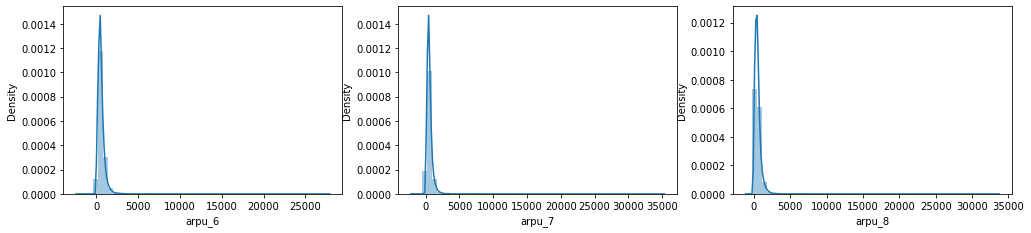

In [182]:
#Lets visualize the average revenue per user for the months of june,july and august to find any patterns
plt.figure(figsize=(17, 20))
plt.subplot(5,3,1)
sns.distplot(df_high_val_cust.arpu_6)
plt.subplot(5,3,2)
sns.distplot(df_high_val_cust.arpu_7)
plt.subplot(5,3,3)
sns.distplot(df_high_val_cust.arpu_8)
plt.show()

In [183]:
#Observation 
# We notice that averagre revenue per user for the months of June and july are around 480
# We also notice that averagre revenue drops to 430 in the month of August.This is "Action Phase"
# This could indicate that some of the customer who are likely to churn may have reduced the usage

In [184]:
#Analyse the attributes with calls within same network operator and different operator for the month of 6,7,8
df_high_val_cust[['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6','offnet_mou_7','offnet_mou_8' ]].describe()


,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8
count,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000
mean,260.900880,268.051744,234.345252,373.800402,378.233106,335.123008
std,459.853278,480.303238,458.751242,482.712621,499.138982,481.985106
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.090000,16.040000,10.440000,71.610000,69.980000,46.760000
50%,84.640000,82.830000,65.660000,222.560000,220.040000,182.840000
75%,290.490000,290.540000,240.630000,487.910000,494.030000,438.860000
max,7376.710000,8157.780000,10752.560000,8362.360000,9667.130000,14007.340000


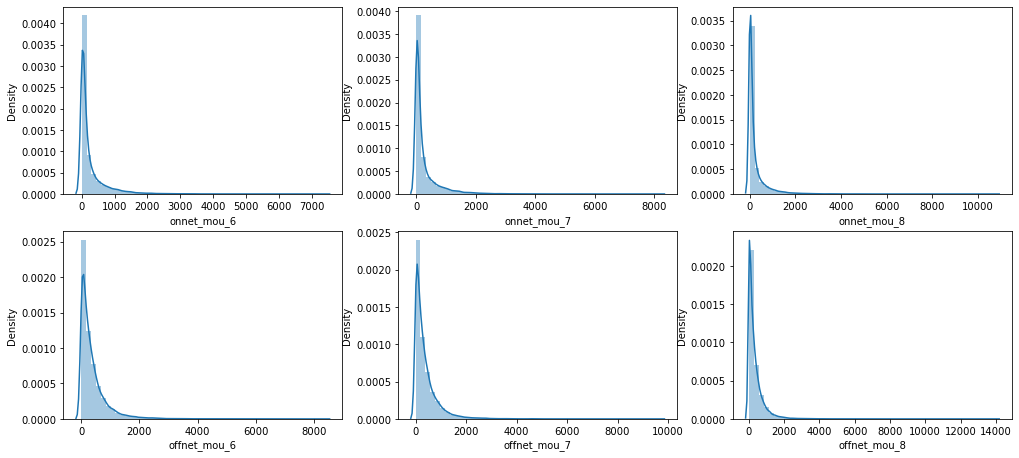

In [185]:
#visualize the onnet and offnet usage on a dist plot
plt.figure(figsize=(17, 20))
plt.subplot(5,3,1)
sns.distplot(df_high_val_cust.onnet_mou_6)
plt.subplot(5,3,2)
sns.distplot(df_high_val_cust.onnet_mou_7)
plt.subplot(5,3,3)
sns.distplot(df_high_val_cust.onnet_mou_8)
plt.subplot(5,3,4)
sns.distplot(df_high_val_cust.offnet_mou_6)
plt.subplot(5,3,5)
sns.distplot(df_high_val_cust.offnet_mou_7)
plt.subplot(5,3,6)
sns.distplot(df_high_val_cust.offnet_mou_8)
plt.show()

In [ ]:
#Observation 
# We notice that averagre values of the minutes of usage for "same networ and "differetn networks"
# are similir for the months of June and july but have dropped for the monht of August

In [186]:
#Analyse the roaming calls details for the month of 6,7,8
df_high_val_cust[['roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8','roam_og_mou_6','roam_og_mou_7','roam_og_mou_8']].describe()



,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8
count,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000
mean,16.124001,12.646145,12.512269,26.596033,20.155134,19.889295
std,76.344227,75.833558,74.179181,116.274169,96.134144,104.799622
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2613.310000,3813.290000,4169.810000,3775.110000,2812.040000,5337.040000


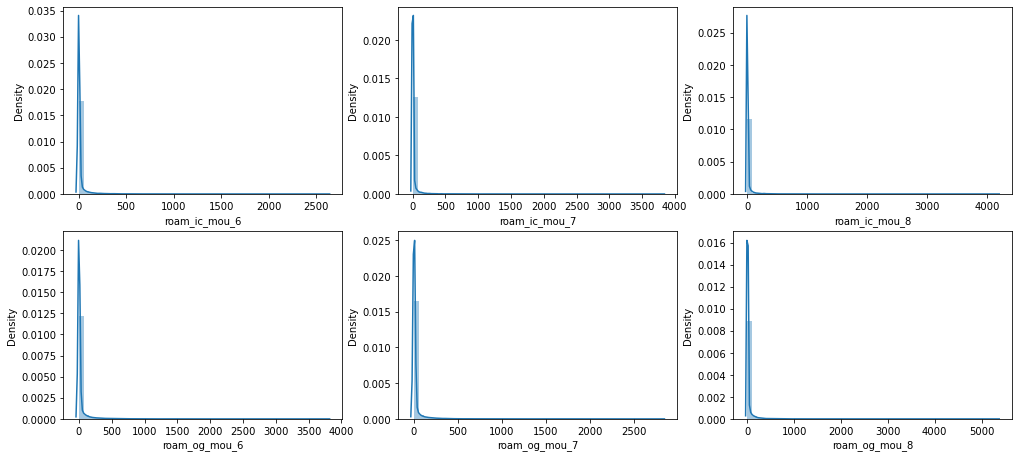

In [187]:
plt.figure(figsize=(17, 20))
plt.subplot(5,3,1)
sns.distplot(df_high_val_cust.roam_ic_mou_6)
plt.subplot(5,3,2)
sns.distplot(df_high_val_cust.roam_ic_mou_7)
plt.subplot(5,3,3)
sns.distplot(df_high_val_cust.roam_ic_mou_8)
plt.subplot(5,3,4)
sns.distplot(df_high_val_cust.roam_og_mou_6)
plt.subplot(5,3,5)
sns.distplot(df_high_val_cust.roam_og_mou_7)
plt.subplot(5,3,6)
sns.distplot(df_high_val_cust.roam_og_mou_8)
plt.show()

In [ ]:
#No significant observation based on roaming call details

In [188]:
#Analyse Local outgoing call minutes of usage details for the month of 6,7,8
#loc_og_mou is basically sum value of loc_og_t2t_mou ,loc_og_t2m_mou , loc_og_t2f_mou and loc_og_t2c_mou
#So we , can just analyse the values loc_og_mou instead of analyzing the detail columns
df_high_val_cust[['loc_og_mou_6','loc_og_mou_7','loc_og_mou_8']].describe()



,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8
count,29953.000000,29953.000000,29953.000000
mean,254.240239,255.285293,235.863120
std,378.546516,375.617344,363.548405
min,0.000000,0.000000,0.000000
25%,32.260000,34.510000,22.540000
50%,124.590000,128.060000,111.010000
75%,332.310000,333.540000,310.680000
max,10643.380000,7674.780000,11039.910000


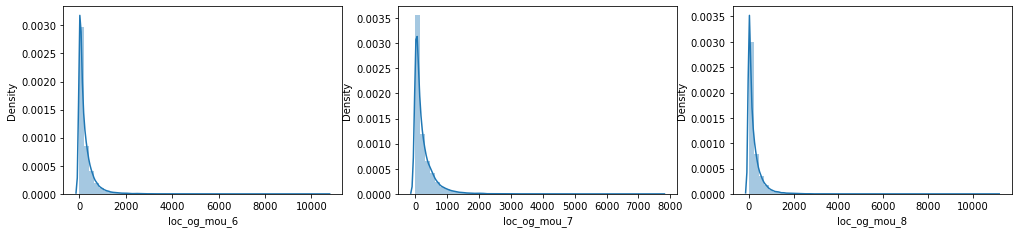

In [189]:
plt.figure(figsize=(17, 20))
plt.subplot(5,3,1)
sns.distplot(df_high_val_cust.loc_og_mou_6)
plt.subplot(5,3,2)
sns.distplot(df_high_val_cust.loc_og_mou_7)
plt.subplot(5,3,3)
sns.distplot(df_high_val_cust.loc_og_mou_8)
plt.show()

In [ ]:
#Average mou (minutes of usage) value of local outgoing calls have decreaed in the month of August compared to June and July
#However there is not a significant drop

In [190]:
#Analyse STD outgoing call minutes of usage details for the month of 6,7,8
#std_og_mou is basically sum value of std_og_t2t_mou ,std_og_t2m_mou , std_og_t2f_mou and std_og_t2c_mou
#So we , can just analyse the values loc_og_mou instead of analyzing the detail columns
df_high_val_cust[['std_og_mou_6','std_og_mou_6','std_og_mou_6']].describe()



,std_og_mou_6,std_og_mou_6,std_og_mou_6
count,29953.000000,29953.000000,29953.000000
mean,347.147123,347.147123,347.147123
std,608.845412,608.845412,608.845412
min,0.000000,0.000000,0.000000
25%,0.400000,0.400000,0.400000
50%,45.080000,45.080000,45.080000
75%,465.290000,465.290000,465.290000
max,8432.990000,8432.990000,8432.990000


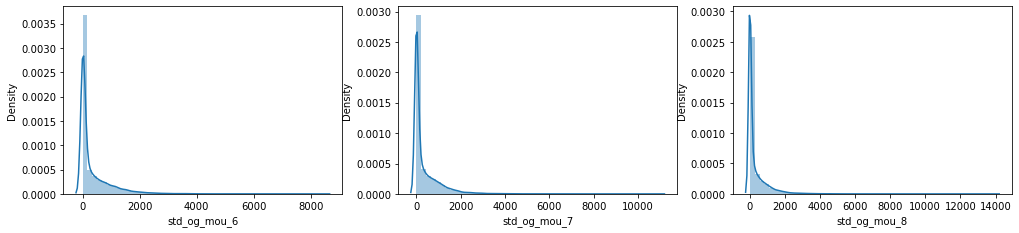

In [191]:
plt.figure(figsize=(17, 20))
plt.subplot(5,3,1)
sns.distplot(df_high_val_cust.std_og_mou_6)
plt.subplot(5,3,2)
sns.distplot(df_high_val_cust.std_og_mou_7)
plt.subplot(5,3,3)
sns.distplot(df_high_val_cust.std_og_mou_8)
plt.show()

In [ ]:
#No significant ovservation based on std outgoing mou

In [192]:
# ISD call details analysis

df_high_val_cust[['isd_og_mou_6','isd_og_mou_6','isd_og_mou_6']].describe()

,isd_og_mou_6,isd_og_mou_6,isd_og_mou_6
count,29953.000000,29953.000000,29953.000000
mean,2.174995,2.174995,2.174995
std,45.888834,45.888834,45.888834
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,5900.660000,5900.660000,5900.660000


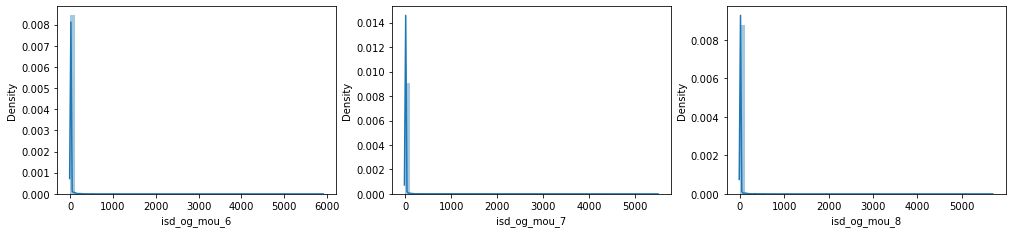

In [193]:
plt.figure(figsize=(17, 20))
plt.subplot(5,3,1)
sns.distplot(df_high_val_cust.isd_og_mou_6)
plt.subplot(5,3,2)
sns.distplot(df_high_val_cust.isd_og_mou_7)
plt.subplot(5,3,3)
sns.distplot(df_high_val_cust.isd_og_mou_8)
plt.show()

In [ ]:
#No significant ovservation based on ISD outgoing mou

In [194]:
#Special outgoing and other outgoing call details analysis
df_high_val_cust[['spl_og_mou_6','spl_og_mou_7','spl_og_mou_8','og_others_6','og_others_7','og_others_8']].describe()

,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8
count,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000
mean,5.825077,7.106715,6.549024,0.661547,0.042961,0.057694
std,17.579228,21.768942,20.289977,4.110913,2.678936,3.317780
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.230000,0.710000,0.430000,0.000000,0.000000,0.000000
75%,5.210000,6.950000,6.140000,0.000000,0.000000,0.000000
max,1023.210000,1265.790000,954.510000,609.810000,370.130000,394.930000


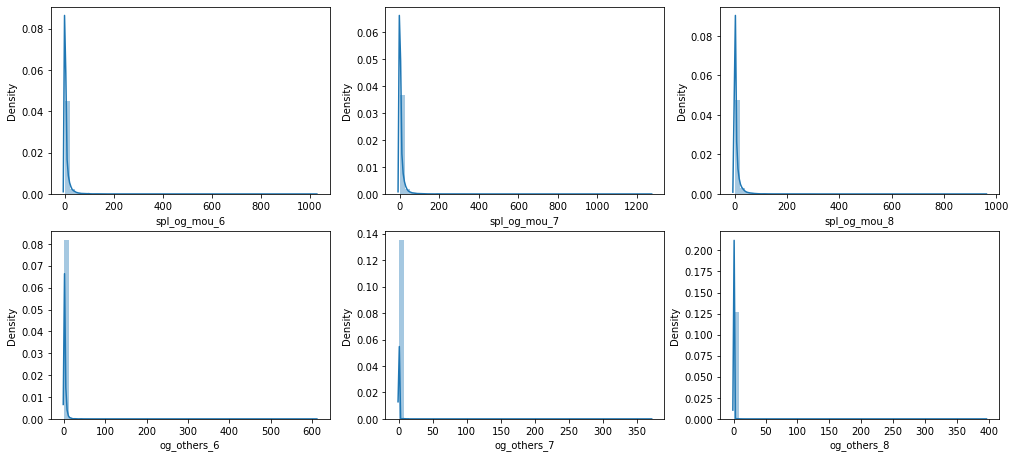

In [195]:
plt.figure(figsize=(17, 20))
plt.subplot(5,3,1)
sns.distplot(df_high_val_cust.spl_og_mou_6)
plt.subplot(5,3,2)
sns.distplot(df_high_val_cust.spl_og_mou_7)
plt.subplot(5,3,3)
sns.distplot(df_high_val_cust.spl_og_mou_8)
plt.subplot(5,3,4)
sns.distplot(df_high_val_cust.og_others_6)
plt.subplot(5,3,5)
sns.distplot(df_high_val_cust.og_others_7)
plt.subplot(5,3,6)
sns.distplot(df_high_val_cust.og_others_8)
plt.show()

In [ ]:
#Observation:
#No significant ovservation based on Special and Other outgoing mou

In [196]:
#Finally analyse total outgoing minutes of usage
df_high_val_cust[['total_og_mou_6','total_og_mou_7','total_og_mou_8']].describe()

,total_og_mou_6,total_og_mou_7,total_og_mou_8
count,29953.000000,29953.000000,29953.000000
mean,610.058005,628.724108,551.929765
std,691.178402,717.567954,700.585424
min,0.000000,0.000000,0.000000
25%,116.640000,116.590000,72.490000
50%,410.630000,425.640000,333.610000
75%,859.030000,891.990000,775.380000
max,10674.030000,11365.310000,14043.060000


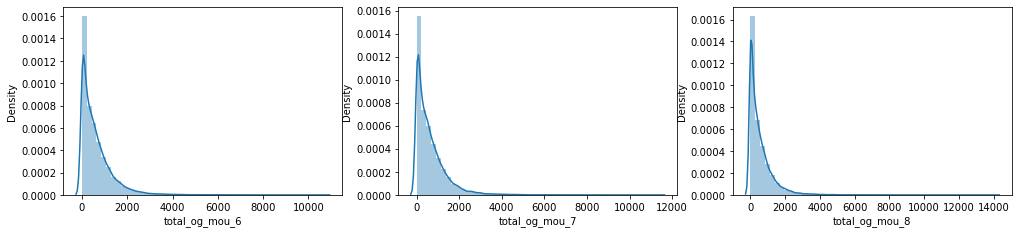

In [197]:
plt.figure(figsize=(17, 20))
plt.subplot(5,3,1)
sns.distplot(df_high_val_cust.total_og_mou_6)
plt.subplot(5,3,2)
sns.distplot(df_high_val_cust.total_og_mou_7)
plt.subplot(5,3,3)
sns.distplot(df_high_val_cust.total_og_mou_8)
plt.show()

In [ ]:
#Observation:
#Total outgoing Average mou (minutes of usage) value have decreaed in the month of August compared to June and July
#There is a significant drop in vlaue form 425 to 333

In [198]:
#Analyse Local incomming call minutes of usage details for the month of 6,7,8
#loc_ic_mou is basically sum value of loc_ic_t2t_mou ,loc_ic_t2m_mou , loc_ic_t2f_mou and loc_ic_t2c_mou
#So we , can just analyse the values loc_ic_mou instead of analyzing the detail columns
df_high_val_cust[['loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8']].describe()


,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8
count,29953.000000,29953.000000,29953.000000
mean,231.284489,234.455252,223.390506
std,315.005426,316.177938,308.483647
min,0.000000,0.000000,0.000000
25%,47.910000,52.540000,40.540000
50%,134.560000,137.660000,128.790000
75%,297.260000,298.780000,285.480000
max,7454.630000,6466.740000,5388.740000


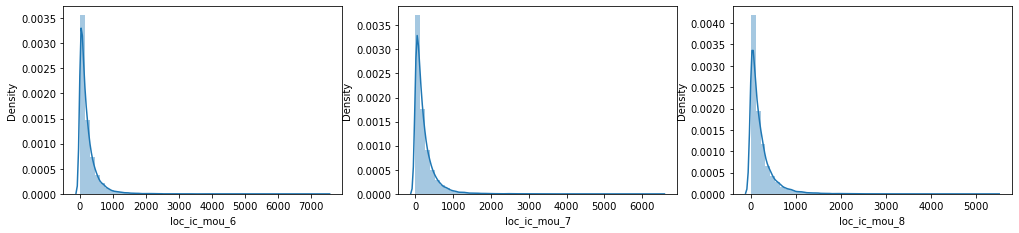

In [199]:
plt.figure(figsize=(17, 20))
plt.subplot(5,3,1)
sns.distplot(df_high_val_cust.loc_ic_mou_6)
plt.subplot(5,3,2)
sns.distplot(df_high_val_cust.loc_ic_mou_7)
plt.subplot(5,3,3)
sns.distplot(df_high_val_cust.loc_ic_mou_8)
plt.show()

In [ ]:
#Observation:
#No significant observation

In [204]:
#Special incomming and other outgoing call details analysis
df_high_val_cust[['spl_ic_mou_6','spl_ic_mou_7','spl_ic_mou_8','ic_others_6','ic_others_7','ic_others_8']].describe()




,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,ic_others_6,ic_others_7,ic_others_8
count,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000
mean,0.061047,0.019767,0.026548,1.155223,1.501800,1.226167
std,0.188124,0.181984,0.110617,13.997065,16.009497,12.793386
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.050000,0.000000,0.000000
max,19.760000,21.330000,6.230000,1344.140000,1495.940000,1209.860000


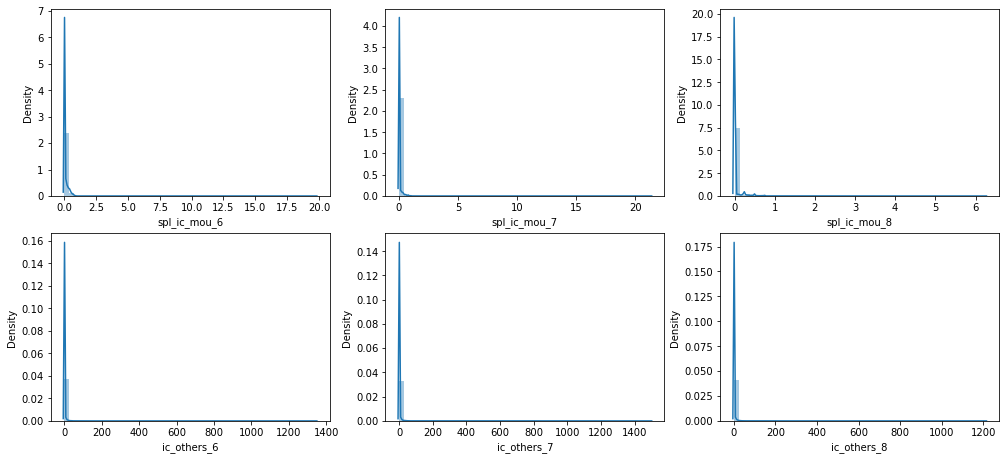

In [205]:
plt.figure(figsize=(17, 20))
plt.subplot(5,3,1)
sns.distplot(df_high_val_cust.spl_ic_mou_6)
plt.subplot(5,3,2)
sns.distplot(df_high_val_cust.spl_ic_mou_7)
plt.subplot(5,3,3)
sns.distplot(df_high_val_cust.spl_ic_mou_8)
plt.subplot(5,3,4)
sns.distplot(df_high_val_cust.ic_others_6)
plt.subplot(5,3,5)
sns.distplot(df_high_val_cust.ic_others_7)
plt.subplot(5,3,6)
sns.distplot(df_high_val_cust.ic_others_8)
plt.show()


In [ ]:
#Observation:
#No significant observation.Average values are almost same for the months of June,July and August

In [206]:

#Finally analyse total incomming minutes of usage
df_high_val_cust[['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8']].describe()

,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8
count,29953.000000,29953.000000,29953.000000
mean,290.121569,296.944240,280.074127
std,365.739944,373.950048,361.356861
min,0.000000,0.000000,0.000000
25%,72.890000,79.030000,61.490000
50%,183.780000,187.710000,173.160000
75%,372.160000,377.560000,361.990000
max,7716.140000,7442.860000,6066.630000


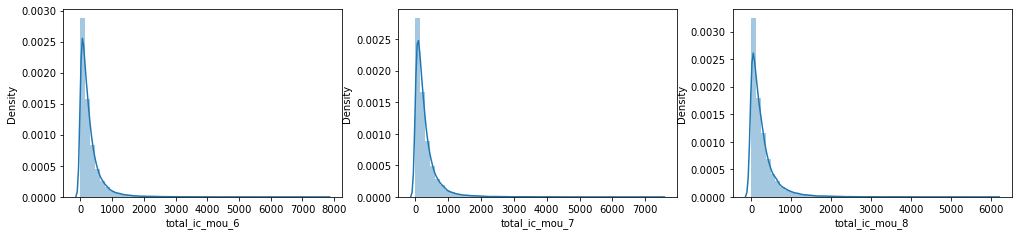

In [207]:
plt.figure(figsize=(17, 20))
plt.subplot(5,3,1)
sns.distplot(df_high_val_cust.total_ic_mou_6)
plt.subplot(5,3,2)
sns.distplot(df_high_val_cust.total_ic_mou_7)
plt.subplot(5,3,3)
sns.distplot(df_high_val_cust.total_ic_mou_8)
plt.show()


In [ ]:
#Observation:
#Average of Total incomming minutes of usage is slightly less in the month of August compared to months june and july
#However there is not a significant drop.

# Bivariate Analysis

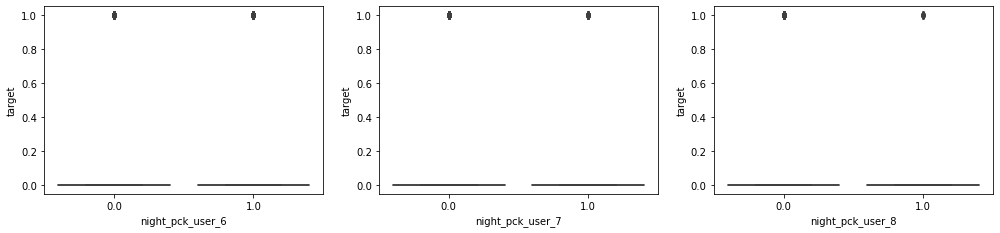

In [210]:
# There are only few categorical variables.Lets visualize the categorical variables

plt.figure(figsize=(17, 20))
plt.subplot(5,3,1)
sns.boxplot(df_high_val_cust.night_pck_user_6, df_high_val_cust.target)
plt.subplot(5,3,2)
sns.boxplot(df_high_val_cust.night_pck_user_7, df_high_val_cust.target)
plt.subplot(5,3,3)
sns.boxplot(df_high_val_cust.night_pck_user_8, df_high_val_cust.target)
plt.show()

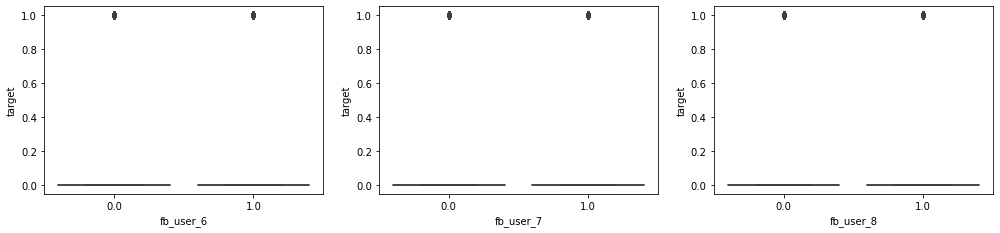

In [211]:
plt.figure(figsize=(17, 20))
plt.subplot(5,3,1)
sns.boxplot(df_high_val_cust.fb_user_6, df_high_val_cust.target)
plt.subplot(5,3,2)
sns.boxplot(df_high_val_cust.fb_user_7, df_high_val_cust.target)
plt.subplot(5,3,3)
sns.boxplot(df_high_val_cust.fb_user_8, df_high_val_cust.target)
plt.show()


In [ ]:
# Observations:
#There are churn/non churn users from both  - Night pack users and those who availing facebook/social networking site

# 3.Handle Outliers

In [212]:
#Lets use 3 - Sigma techiqueue for outliers treatement
#about 68% of values drawn from a normal distribution are within one standard deviation σ away from the mean; 
#about 95% of the values lie within two standard deviations; and 
#about 99.7% are within three standard deviations.

# We done want to loose the data so , idea is not to remove the outlier records rather CAP the outliers.

#Lets define a function for capping outliers. We will apply this function on all appropriate columsn in dataset
def cap_outliers_3sigma(col, k=3):
    upper_cap = col.mean() + k*col.std()
    lower_cap = col.mean() - k*col.std()
    col[col<lower_cap] = lower_cap
    col[col>upper_cap] = upper_cap
    return col

In [213]:
#Excluding below columns from outlier capping because these are date/categorical columns/primary key
exclude_cols_from_capping = ['mobile_number','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8',
'night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8',
'target',]

cap_columns = [column for column in df_high_val_cust.columns if column not in exclude_cols_from_capping]
#cap_columns

In [214]:
#Check the MAX value(outliers) before capping
df_high_val_cust[cap_columns].describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,amt_rech_6,amt_rech_7,total_avg_rech_amt_good_phase
count,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000
mean,558.820058,561.160547,508.890301,260.900880,268.051744,234.345252,373.800402,378.233106,335.123008,16.124001,12.646145,12.512269,26.596

In [215]:
# cap outliers for the column listed above
df_high_val_cust[cap_columns] = df_high_val_cust[cap_columns].apply(cap_outliers_3sigma, axis=0)

In [216]:
#Check the MAX value(outliers) after capping
df_high_val_cust[cap_columns].describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,amt_rech_6,amt_rech_7,total_avg_rech_amt_good_phase
count,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000
mean,548.514161,551.188115,498.725003,244.617463,251.474623,216.847412,358.765330,362.186397,319.502304,12.335785,9.182920,9.227090,20.60972

In [217]:
####### End Outlier Treatment ######

# 4.Handle class imbalance using SMOT technique

In [218]:
# Importing the packages necessary for Data processing and modelling

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, f1_score, roc_curve
from imblearn.metrics import sensitivity_specificity_support
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [219]:
# Dividing into X and Y sets for the model building

churn_final_df = df_high_val_cust.copy()
y = churn_final_df['target']
X = churn_final_df.drop(['mobile_number', 'target'], axis=1)

##### As we have already seen that target class is highly imbalanced i.e. ~92% customers have been tagged as Non-churn and rest ~8% as Churn
##### To handle this class imbalance, we have applied SMOTE (Synthetic Minority Oversampling Technique) where synthetic samples are generated for minority class and it is oversampled to match the majority class

In [220]:
# Applying the oversampling technique

sm = SMOTE(random_state=42)
X_bal, y_bal = sm.fit_resample(X,y)

In [221]:
# Check the shape of dataset before and after oversampling

print('Shape of training data set before over-sampling - {}'.format(X.shape))
print('Shape of training data set after over-sampling - {}'.format(X_bal.shape))

Shape of training data set before over-sampling - (29953, 145)
Shape of training data set after over-sampling - (55040, 145)


In [222]:
# Check the ratio of churn vs non-churn before and after oversampling

print('Ratio of churn and non-churn before over-sampling - \n{}'.format(round(y.value_counts()/len(y)*100,2)))
print('\n')
print('Ratio of churn and non-churn after over-sampling - \n{}'.format(round(y_bal.value_counts()/len(y_bal)*100,2)))

Ratio of churn and non-churn before over-sampling - 
0    91.88
1     8.12
Name: target, dtype: float64


Ratio of churn and non-churn after over-sampling - 
0    50.0
1    50.0
Name: target, dtype: float64


In [223]:
# split the oversampled dataset into train and test

X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.3, random_state=101)

# 5.PCA and building model for predection

### Principal Component Analysis (PCA)

In [224]:
# Scale the features into common scale i.e. Standardization

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [225]:
# Apply pca to scaled training data set

pca = PCA(random_state=42)
pca.fit(X_train_scaled)

PCA(random_state=42)

In [226]:
# Extract PCA model components

pca.components_

array([[ 0.10687708,  0.14743868,  0.15848658, ..., -0.00304758,
         0.0298534 ,  0.01593155],
       [-0.05123373, -0.02244144,  0.0352276 , ...,  0.08121296,
         0.10736377,  0.11568542],
       [ 0.06507783,  0.15674982,  0.15076404, ...,  0.11275878,
         0.19271517,  0.18693543],
       ...,
       [-0.00286785, -0.00847953,  0.00454154, ..., -0.02532089,
        -0.03625044,  0.01570919],
       [-0.00326917,  0.00600749,  0.0003978 , ..., -0.04820067,
         0.04287382, -0.00191847],
       [-0.00211277,  0.00155839,  0.00205257, ..., -0.02796161,
         0.00892732,  0.00811585]])

In [227]:
# Let's look at the explainded variance of PCA components

pca.explained_variance_ratio_

array([1.20641936e-01, 1.10821546e-01, 6.09895489e-02, 4.95171216e-02,
       3.75832127e-02, 3.58239204e-02, 3.03802446e-02, 2.82953613e-02,
       2.29436856e-02, 2.11995638e-02, 2.03505940e-02, 1.96035268e-02,
       1.79576010e-02, 1.69049402e-02, 1.56268646e-02, 1.47513211e-02,
       1.34578261e-02, 1.32293317e-02, 1.29067037e-02, 1.15457392e-02,
       9.86465539e-03, 9.85195010e-03, 9.48108523e-03, 9.36607121e-03,
       9.20884081e-03, 8.98521057e-03, 8.79715397e-03, 8.68523184e-03,
       8.38431257e-03, 7.59221744e-03, 7.24129296e-03, 7.00181596e-03,
       6.88599954e-03, 6.66388706e-03, 6.63844465e-03, 6.42966699e-03,
       6.14803263e-03, 6.03399440e-03, 5.76212893e-03, 5.58882146e-03,
       5.43916103e-03, 5.34289405e-03, 5.12405034e-03, 4.96599118e-03,
       4.87392326e-03, 4.78463913e-03, 4.69346347e-03, 4.63254577e-03,
       4.61564085e-03, 4.39414688e-03, 4.29795120e-03, 4.24852964e-03,
       3.97084266e-03, 3.86502821e-03, 3.74894389e-03, 3.70665664e-03,
      

In [228]:
# Explained cumulative variance of PCA components

var_cumu = np.cumsum(pca.explained_variance_ratio_)
pd.Series(np.round(var_cumu*100, 2))

0       12.06
1       23.15
2       29.25
3       34.20
4       37.96
5       41.54
6       44.58
7       47.41
8       49.70
9       51.82
10      53.85
11      55.82
12      57.61
13      59.30
14      60.86
15      62.34
16      63.68
17      65.01
18      66.30
19      67.45
20      68.44
21      69.42
22      70.37
23      71.31
24      72.23
25      73.13
26      74.01
27      74.88
28      75.72
29      76.47
30      77.20
31      77.90
32      78.59
33      79.25
34      79.92
35      80.56
36      81.18
37      81.78
38      82.36
39      82.91
40      83.46
41      83.99
42      84.50
43      85.00
44      85.49
45      85.97
46      86.44
47      86.90
48      87.36
49      87.80
50      88.23
51      88.66
52      89.05
53      89.44
54      89.81
55      90.18
56      90.54
57      90.88
58      91.21
59      91.53
60      91.84
61      92.14
62      92.43
63      92.70
64      92.97
65      93.23
66      93.49
67      93.74
68      93.98
69      94.21
70      94.43
71    

###### 90% variance is explained by 55 components
###### 95% variance is explained by 73 components

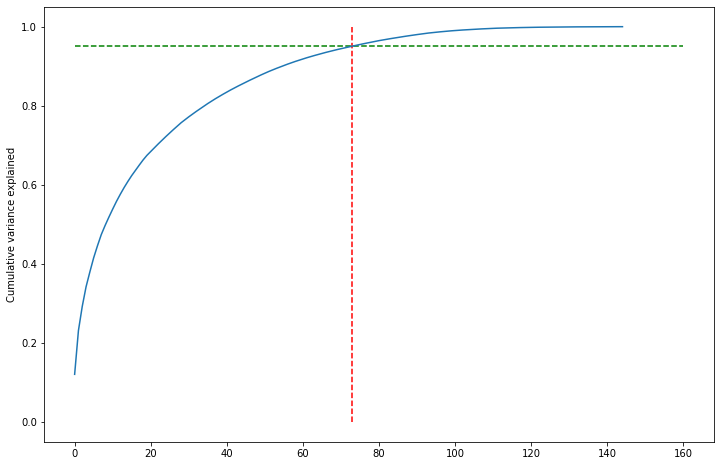

In [230]:
# Plot the total components vs the cumulative variance explained by components

fig = plt.figure(figsize=[12,8])
plt.vlines(x=73, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=160, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

#### Perform PCA with 73 components

In [231]:
# Apply PCA with 73 components

pca_final = IncrementalPCA(n_components=73)

churn_train_pca = pca_final.fit_transform(X_train_scaled)
churn_train_pca.shape

(38528, 73)

In [232]:
# Check PCA components

churn_train_pca

array([[ 1.54652301,  0.76061452, -2.76743015, ..., -0.24973637,
        -0.24155896, -0.63756754],
       [ 2.51977148,  5.17159698,  1.50221764, ...,  0.52749296,
         0.0590759 ,  0.17148578],
       [ 1.12351083,  3.86996828, -3.39456192, ...,  0.6565656 ,
        -0.42823917, -0.57027259],
       ...,
       [-2.61202143,  6.19645502,  3.4000677 , ..., -0.34503413,
         0.2778404 , -0.39856702],
       [16.156519  , -1.82812068,  2.24299871, ..., -0.14753015,
        -0.09350971,  0.45263699],
       [ 0.17224188, -5.34355627,  2.27626644, ..., -0.05026416,
         0.10019544, -0.11644475]])

In [233]:
# Applying the same pca transformation on test dataset

churn_test_pca = pca_final.transform(X_test_scaled)
churn_test_pca.shape

(16512, 73)

### Logistic Regression on the principal components data

In [234]:
# Apply logistic regression on the PCA dataset

log_reg_pca = LogisticRegression()
model_pca = log_reg_pca.fit(churn_train_pca, y_train)

##### Making predictions on test set

In [235]:
# Calculate predicted values on test data set

y_pred = model_pca.predict(churn_test_pca)

In [236]:
# Confusion matrix

print(confusion_matrix(y_test, y_pred))

[[6938 1352]
 [1166 7056]]


In [237]:
# Classification report - Accuracy, Precision, Recall, F1_Score

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      8290
           1       0.84      0.86      0.85      8222

    accuracy                           0.85     16512
   macro avg       0.85      0.85      0.85     16512
weighted avg       0.85      0.85      0.85     16512



In [238]:
# Let's look at the various performance matrix

sensi, speci,_ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print('Sensitivity: {}'.format(round(sensi, 2)))
print('Specificity: {}'.format(round(speci, 2)))

pred_probs_test = model_pca.predict_proba(churn_test_pca)
auc_score = roc_auc_score(y_test, pred_probs_test[:,1])
print('AUC Score: {}'.format(round(auc_score, 2)))

Sensitivity: 0.86
Specificity: 0.84
AUC Score: 0.92


In [239]:
# Function to draw the ROC curve

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False)
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

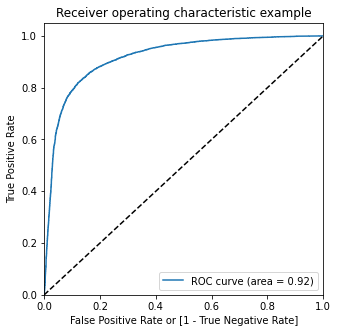

In [240]:
# Draw the ROC curve

draw_roc(y_test, pred_probs_test[:,1])

**Findings**: With Logistic regression, however we have auc score as 0.92 but the sensitivity is less 0.86 which we should increase

### PCA with Random Forest

##### Let's apply RF technique on the PCA data

In [241]:
# Apply random forest classifier algorithm

r_forest = RandomForestClassifier(random_state=42, n_jobs=-1)

In [242]:
# Setting the hyperparamters in order to tune the model 

params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50],
    'n_estimators': [10, 25, 50],
    "criterion": ['entropy']
}

# Specify the stratified K number of folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 101)

In [243]:
# Apply grid search cross validation technique and fit the data

grid_search = GridSearchCV(estimator = r_forest,
                          param_grid = params,
                          cv = folds,
                          n_jobs = -1,
                          verbose = 1,
                          scoring = 'roc_auc')

grid_search.fit(churn_train_pca, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=101, shuffle=True),
             estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50],
                         'n_estimators': [10, 25, 50]},
             scoring='roc_auc', verbose=1)

In [244]:
# Model's best parameters

grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'min_samples_leaf': 5,
 'n_estimators': 50}

In [245]:
# Model's best score

grid_search.best_score_

0.9764445882774844

##### Making predictions on test set

In [246]:
# Calculate predicted values on test data set

y_pred_rf = grid_search.predict(churn_test_pca)

In [247]:
# Confusion matrix

print(confusion_matrix(y_test, y_pred_rf))

[[7654  636]
 [ 395 7827]]


In [248]:
# Classification report - Accuracy, Precision, Recall, F1_Score

print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94      8290
           1       0.92      0.95      0.94      8222

    accuracy                           0.94     16512
   macro avg       0.94      0.94      0.94     16512
weighted avg       0.94      0.94      0.94     16512



In [249]:
# Let's look at the various performance matrix

sensi, speci,_ = sensitivity_specificity_support(y_test, y_pred_rf, average='binary')
print('Sensitivity: {}'.format(round(sensi, 2)))
print('Specificity: {}'.format(round(speci, 2)))

pred_probs_test_rf = grid_search.predict_proba(churn_test_pca)
auc_score = roc_auc_score(y_test, pred_probs_test_rf[:,1])
print('AUC Score: {}'.format(round(auc_score, 2)))

Sensitivity: 0.95
Specificity: 0.92
AUC Score: 0.98


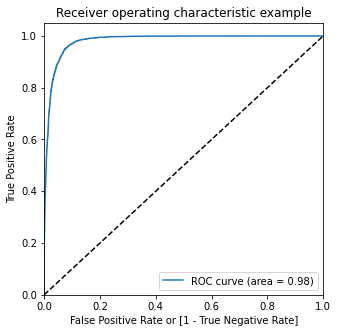

In [250]:
# Draw the ROC curve

draw_roc(y_test, pred_probs_test_rf[:,1])

**Conclusion**: Random Forest gives better performance than Logistic Regression in terms of all the metrics - Sensitivity, Specificity and AUC score

##### Model's performance have been significantly increased with PCA + Random Forest but at the same time interpretabiliy is lost. Let's create another model without PCA so that model would be highly interpretable

# 6.Build another model to explain important features.

### Random Forest to extract important features

In [251]:
# Apply Random Forest technique with some standard hyperparameters 

rf_model2 = RandomForestClassifier(n_estimators=100, 
                                   max_depth=20, 
                                   max_features=15, 
                                   random_state=101, 
                                   oob_score=True, 
                                   verbose=1)

In [252]:
# Fit the model with training data

rf_model2.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   31.1s finished


RandomForestClassifier(max_depth=20, max_features=15, oob_score=True,
                       random_state=101, verbose=1)

In [253]:
# Calculate the oob score

rf_model2.oob_score_

0.9603664867109635

##### Extracting the important features

In [254]:
# Taking out how important the various features are

feature_imp_perc = rf_model2.feature_importances_

In [255]:
# Extracting the features and their importance

features = X.columns

feature_importance = pd.DataFrame({'features':features, 'importance_percentage': feature_imp_perc*100})
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False)
feature_importance = feature_importance.reset_index(drop=True)
feature_importance

,features,importance_percentage
0,total_ic_mou_8,5.289546
1,roam_og_mou_8,5.063238
2,roam_ic_mou_8,4.916140
3,loc_ic_t2m_mou_8,4.502152
4,total_rech_amt_8,4.487202
5,loc_ic_t2t_mou_8,4.422985
6,loc_ic_mou_8,3.987187
7,arpu_8,3.563128
8,fb_user_8,3.479236
9,loc_og_mou_8,3.201266


##### Taking top 30 features

In [256]:
# Considering top 30 features to explain the model

top_features = feature_importance['features'][0:30]
top_features

0         total_ic_mou_8
1          roam_og_mou_8
2          roam_ic_mou_8
3       loc_ic_t2m_mou_8
4       total_rech_amt_8
5       loc_ic_t2t_mou_8
6           loc_ic_mou_8
7                 arpu_8
8              fb_user_8
9           loc_og_mou_8
10    last_day_rch_amt_8
11     total_rech_data_8
12    av_rech_amt_data_8
13       max_rech_data_8
14        max_rech_amt_8
15        total_og_mou_8
16      loc_og_t2t_mou_8
17      loc_og_t2m_mou_8
18          offnet_mou_8
19      total_rech_num_8
20           vol_2g_mb_8
21      loc_ic_t2f_mou_8
22          spl_og_mou_7
23         roam_og_mou_7
24          std_ic_mou_8
25    last_day_rch_amt_7
26           vol_3g_mb_8
27             fb_user_7
28      std_ic_t2m_mou_8
29      total_rech_num_7
Name: features, dtype: object

In [257]:
# Filter the top featues from both train and test dataset

X_train_filtered = X_train[top_features] 
X_test_filtered = X_test[top_features]

### Logistic Regression on top features extracted from Random Forest

In [258]:
# Scale the features into common scale i.e. Standardization

scaler2 = StandardScaler()
X_train_filt_scaled = scaler2.fit_transform(X_train_filtered)
X_test_filt_scaled = scaler2.transform(X_test_filtered)

In [259]:
# Apply logistic regeression on filtered data and fit the model

log_reg_feat_imp = LogisticRegression()
model_log2 = log_reg_feat_imp.fit(X_train_filt_scaled, y_train)

In [260]:
# Calculate predicted values on test data set

y_pred2 = model_log2.predict(X_test_filt_scaled)

In [261]:
# Confusion matrix

print(confusion_matrix(y_test, y_pred2))

[[6788 1502]
 [1327 6895]]


In [262]:
# Classification report - Accuracy, Precision, Recall, F1_Score

print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83      8290
           1       0.82      0.84      0.83      8222

    accuracy                           0.83     16512
   macro avg       0.83      0.83      0.83     16512
weighted avg       0.83      0.83      0.83     16512



In [263]:
# Let's look at the various performance matrix

sensi, speci,_ = sensitivity_specificity_support(y_test, y_pred2, average='binary')
print('Sensitivity: {}'.format(round(sensi, 2)))
print('Specificity: {}'.format(round(speci, 2)))

pred_probs_test2 = model_log2.predict_proba(X_test_filt_scaled)
auc_score = roc_auc_score(y_test, pred_probs_test2[:,1])
print('AUC Score: {}'.format(round(auc_score, 2)))

Sensitivity: 0.84
Specificity: 0.82
AUC Score: 0.9


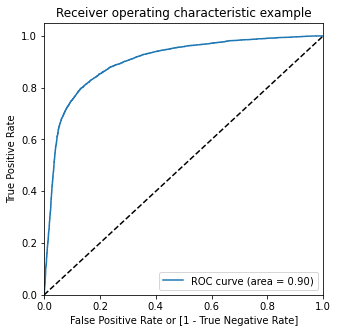

In [264]:
# Draw the ROC curve

draw_roc(y_test, pred_probs_test2[:,1])

# 7.Conclusion

##### Conclusion - 
##### 1. Model-1 - PCA with Random Forest gives better performance over PCA with Logistic Regression but interpretability is lost as principal components have been used to build the model.
##### 2. Model-2 - Logistic Regression is applied on the important features extracted from random forest, which gives the better interpretability but at the same time performance is little compromised.
##### 3 Recomendations -Important features that the telcom provider should consider are - roaming outgoing/incomming usage ,Total incomming usage , total recharge amount , facebook/social media  schemes.The company should focus on these features.For example providing good  packs to customers who are on roaming.